# **Real Estate Price Prediction: Exploratory Data Analysis**

## **Importing and Loading the Desired Dataset**

In [1]:
# ============================================
# 1. IMPORTS
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

sns.set_style("whitegrid")

# ============================================
# 2. LOAD CSV  (CHANGE ONLY THIS LINE)
# ============================================
FILE = "usa_improved_cleaned_listings.csv"   # <-- CHANGE TO usa / iraq / lebanon dataset
df = pd.read_csv(FILE)

print("Loaded:", FILE)
df.head()


Loaded: usa_improved_cleaned_listings.csv


,url,address,price,bedrooms,bathrooms,area,description,type,year_built,lot_size,...,amenities_char_count,has_security_amenities,has_parking_amenities,has_pool_amenities,has_gym_amenities,has_kitchen_amenities,has_outdoor_amenities,has_luxury_amenities,has_utilities_amenities,total_amenities
0,https://www.redfin.com/CA/West-Hollywood/1131-...,"1131 Alta Loma Rd #106, West Hollywood, CA 90069",639000.0,1.0,1.0,741.0,Welcome to Northridge Village—an exceptional g...,Townhome,1965.0,Elevation Units: Feet,...,111,0,1,1,0,0,0,0,2,8
1,https://www.redfin.com/CA/Woodland-Hills/22666...,"22666 Cavalier St, Woodland Hills, CA 91364",1099900.0,3.0,3.0,2128.0,Welcome to this charming first-floor condo in ...,Condo,1967.0,Elevation Units: Feet,...,98,0,1,1,0,0,0,0,2,7
2,https://www.redfin.com/CA/Encino/5403-Newcastl...,"5403 Newcastle Ave #28, Encino, CA 91316",385000.0,2.0,2.0,944.0,Experience resort-style living in this spaciou...,Condo,1972.0,"Lot Size (Sq. Ft.): 100,184",...,61,0,1,1,0,0,0,0,0,4
3,https://www.redfin.com/CA/Reseda/8031-Canby-Av...,"8031 Canby Ave #4, Reseda, CA 91335",565000.0,3.0,2.0,1529.0,This fabulous Cul-de-Sac Woodland Hills Home (...,Single-family,1966.0,Elevation Units: Feet,...,111,0,1,1,0,0,0,0,2,8
4,https://www.redfin.com/CA/Tujunga/10141-McClem...,"10141 Mcclemont Ave, Tujunga, CA 91042",629000.0,2.0,2.0,900.0,Welcome to Downtown LA living at its finest. U...,Condo,2005.0,Elevation Units: Feet,...,98,0,1,1,0,0,0,0,2,7


## **Exploring the Dataset**

In [2]:
# Detect dataset type
columns = set(df.columns)

IS_USA = {"year_built", "lot_size", "state"}.issubset(columns)
IS_LEBANON = {"district"}.issubset(columns)
IS_IRAQ = {"type", "city"}.issubset(columns) and not IS_LEBANON

print("Dataset Type:")
if IS_USA:
    print(" → USA detected")
elif IS_LEBANON:
    print(" → LEBANON detected")
elif IS_IRAQ:
    print(" → IRAQ detected")
else:
    print(" → UNKNOWN — only common EDA will run")


Dataset Type:
 → USA detected


In [3]:
print("\n=== BASIC OVERVIEW ===")
display(df.info())
display(df.describe())
print("Missing values:\n", df.isna().sum())
print("Duplicate URLs:", df.duplicated("url").sum())


=== BASIC OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3515 entries, 0 to 3514
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      3515 non-null   object 
 1   address                  3515 non-null   object 
 2   price                    3515 non-null   float64
 3   bedrooms                 3515 non-null   float64
 4   bathrooms                3515 non-null   float64
 5   area                     3515 non-null   float64
 6   description              3515 non-null   object 
 7   type                     3515 non-null   object 
 8   year_built               3515 non-null   float64
 9   lot_size                 3515 non-null   object 
 10  parking                  3515 non-null   object 
 11  amenities                3515 non-null   object 
 12  state                    3515 non-null   object 
 13  city                     3515 non-null   object 
 14  

None

,price,bedrooms,bathrooms,area,year_built,property_age,price_per_sqft,description_word_count,description_char_count,amenities_word_count,amenities_char_count,has_security_amenities,has_parking_amenities,has_pool_amenities,has_gym_amenities,has_kitchen_amenities,has_outdoor_amenities,has_luxury_amenities,has_utilities_amenities,total_amenities
count,3.515000e+03,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.0,3515.000000,3515.000000,3515.0,3515.0,3515.0,3515.0,3515.000000,3515.000000
mean,6.330430e+05,2.919203,2.073969,1597.380939,1975.577809,49.415078,425.261707,155.290469,1006.591181,11.327169,113.634993,0.0,0.907824,0.340256,0.0,0.0,0.0,0.0,1.627312,7.797155
std,3.805620e+05,1.552080,1.095701,737.915515,35.057549,35.024438,233.484457,83.364425,549.014053,4.173996,37.035519,0.0,0.289316,0.473863,0.0,0.0,0.0,0.0,0.644970,2.459829
min,3.135000e+04,0.000000,1.000000,468.000000,1800.000000,0.000000,34.324943,1.000000,3.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,3.500000e+05,2.000000,1.000000,1064.000000,1953.000000,20.000000,246.372234,98.000000,632.000000,9.000000,96.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,7.000000
50%,5.450000e+05,3.000000,2.000000,1432.000000,1979.000000,46.000000,374.624625,131.000000,856.000000,11.000000,111.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,2.000000,8.000000
75%,7.999000e+05,4.000000,2.000000,1986.000000,2005.000000,72.000000,555.918742,200.000000,1301.000000,13.000000,137.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,2.000000,9.000000
max,1.900000e+06,47.000000,28.000000,4402.000000,2025.000000,200.000000,1500.000000,598.000000,3969.000000,34.000000,266.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,3.000000,14.000000


Missing values:
 url                        0
address                    0
price                      0
bedrooms                   0
bathrooms                  0
area                       0
description                0
type                       0
year_built                 0
lot_size                   0
parking                    0
amenities                  0
state                      0
city                       0
country                    0
property_age               0
price_per_sqft             0
description_word_count     0
description_char_count     0
amenities_word_count       0
amenities_char_count       0
has_security_amenities     0
has_parking_amenities      0
has_pool_amenities         0
has_gym_amenities          0
has_kitchen_amenities      0
has_outdoor_amenities      0
has_luxury_amenities       0
has_utilities_amenities    0
total_amenities            0
dtype: int64
Duplicate URLs: 5


## **Price Distributions**

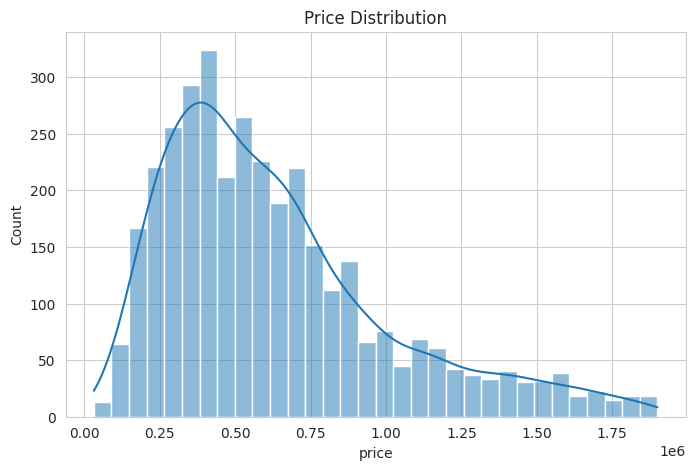

In [4]:
# ---- PRICE DISTRIBUTION ----
plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()

## **Price Distribution**

The histogram reveals a **right-skewed distribution** of property prices:

- Most listings cluster between **200K and 700K**, forming the main body of the distribution.
- The KDE curve confirms a strong concentration of mid-range prices.
- The long right tail shows fewer but substantial high-price properties (1M+), consistent with the outliers seen in the boxplot.
- This skewness indicates:
  - Prices are not normally distributed.
  - A log transformation may help stabilize variance and improve model performance.
  - The market has a wide spread, with a small percentage of premium listings.

Overall, the distribution reflects a typical real-estate market structure: many mid-priced properties and fewer high-value ones.


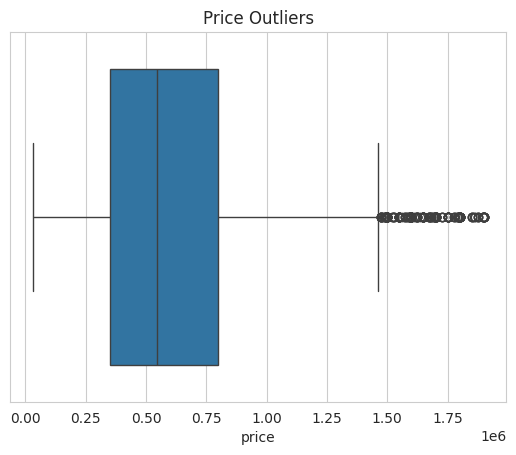

In [5]:
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()

## **Price Outliers (Boxplot Analysis)**

The boxplot shows that the price variable contains several **high-value outliers** extending far beyond the upper whisker.  
Key observations:

- Most properties fall within a moderate price range, but a noticeable number of listings exceed **1.2M–1.8M**, creating a long right tail.
- These extreme prices significantly stretch the scale, indicating:
  - Possible luxury properties.
  - Market imbalance between typical and high-end listings.

Overall, the price distribution is **not symmetric**, and the presence of strong outliers suggests caution when applying models sensitive to extreme values.


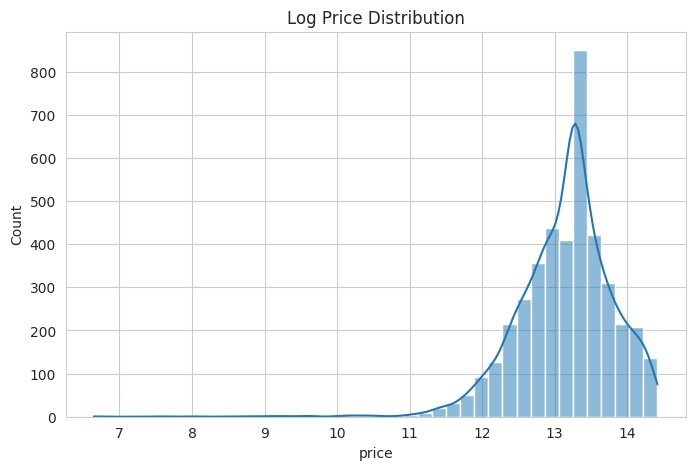

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['price']), bins=40, kde=True)
plt.title("Log Price Distribution")
plt.show()

## **Log-Transformed Price Distribution**

After applying a logarithmic transformation to the price variable, the distribution becomes **much more symmetric** compared to the raw price distribution.

Key points:

- The log-transformed prices cluster tightly between **12 and 14**, showing a more compact and concentrated distribution.
- The KDE curve indicates a shape that is closer to **normal (bell-shaped)**, reducing the strong right-skew present in the original price data.
- This transformation helps:
  - Stabilize variance.
  - Reduce the influence of extreme high-price outliers.
  - Improve model performance for algorithms that assume or benefit from more normally distributed features.

In short, the log transformation effectively normalizes the price variable and makes it more suitable for predictive modeling.


## **Numerical Feature Distributions**

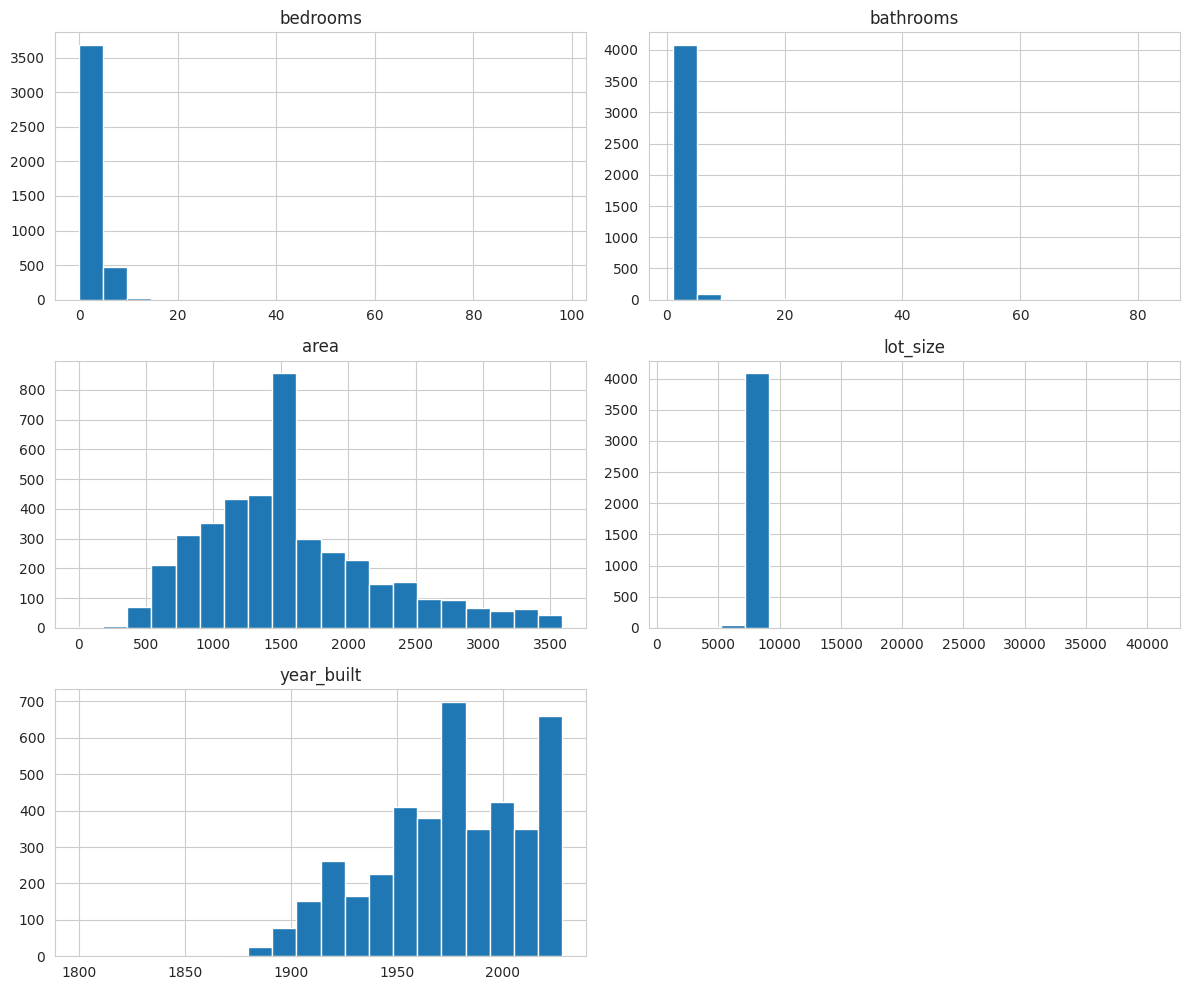

In [ ]:
num_cols = ['bedrooms','bathrooms','area','lot_size','parking','year_built']

df[num_cols].hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

## **Numerical Feature Distributions**

### **Bedrooms**
Most properties have a small number of bedrooms, with the majority falling between **1–4 bedrooms**.  
Higher values exist but are extremely rare, suggesting outliers or very large luxury properties.

### **Bathrooms**
Similar to bedrooms, bathrooms are heavily concentrated in the **1–3** range.  
Counts above this range are uncommon and likely represent premium or multi-unit listings.

### **Area**
The area distribution is more spread out, with a strong concentration between **1,000–2,000 sq ft**.  
The histogram shows a long right tail, indicating some large properties up to 3,500+ sq ft.  
The distribution is moderately right-skewed.

### **Lot Size**
Lot size shows very heavy right-skewness.  
Most properties fall around **5,000–10,000 sq ft**, but there are extreme outliers reaching **30,000–40,000+ sq ft**.  
This feature may require scaling or log transformation for modeling.

### **Year Built**
The distribution shows several peaks around **1950, 1970, 1990, and 2000+**, indicating distinct building waves.  
More recent years dominate, suggesting the dataset contains mostly modern or renovated properties.

---

Overall, the numerical features show:
- **Right-skewed distributions** for most size-related features.
- **Strong outliers** in lot_size, area, bedrooms, and bathrooms.
- **Temporal clustering** in year_built.

These patterns highlight the need for:
- Potential log transforms,
- Outlier handling,
- Feature normalization before modeling.


## **Price vs Key Variables**

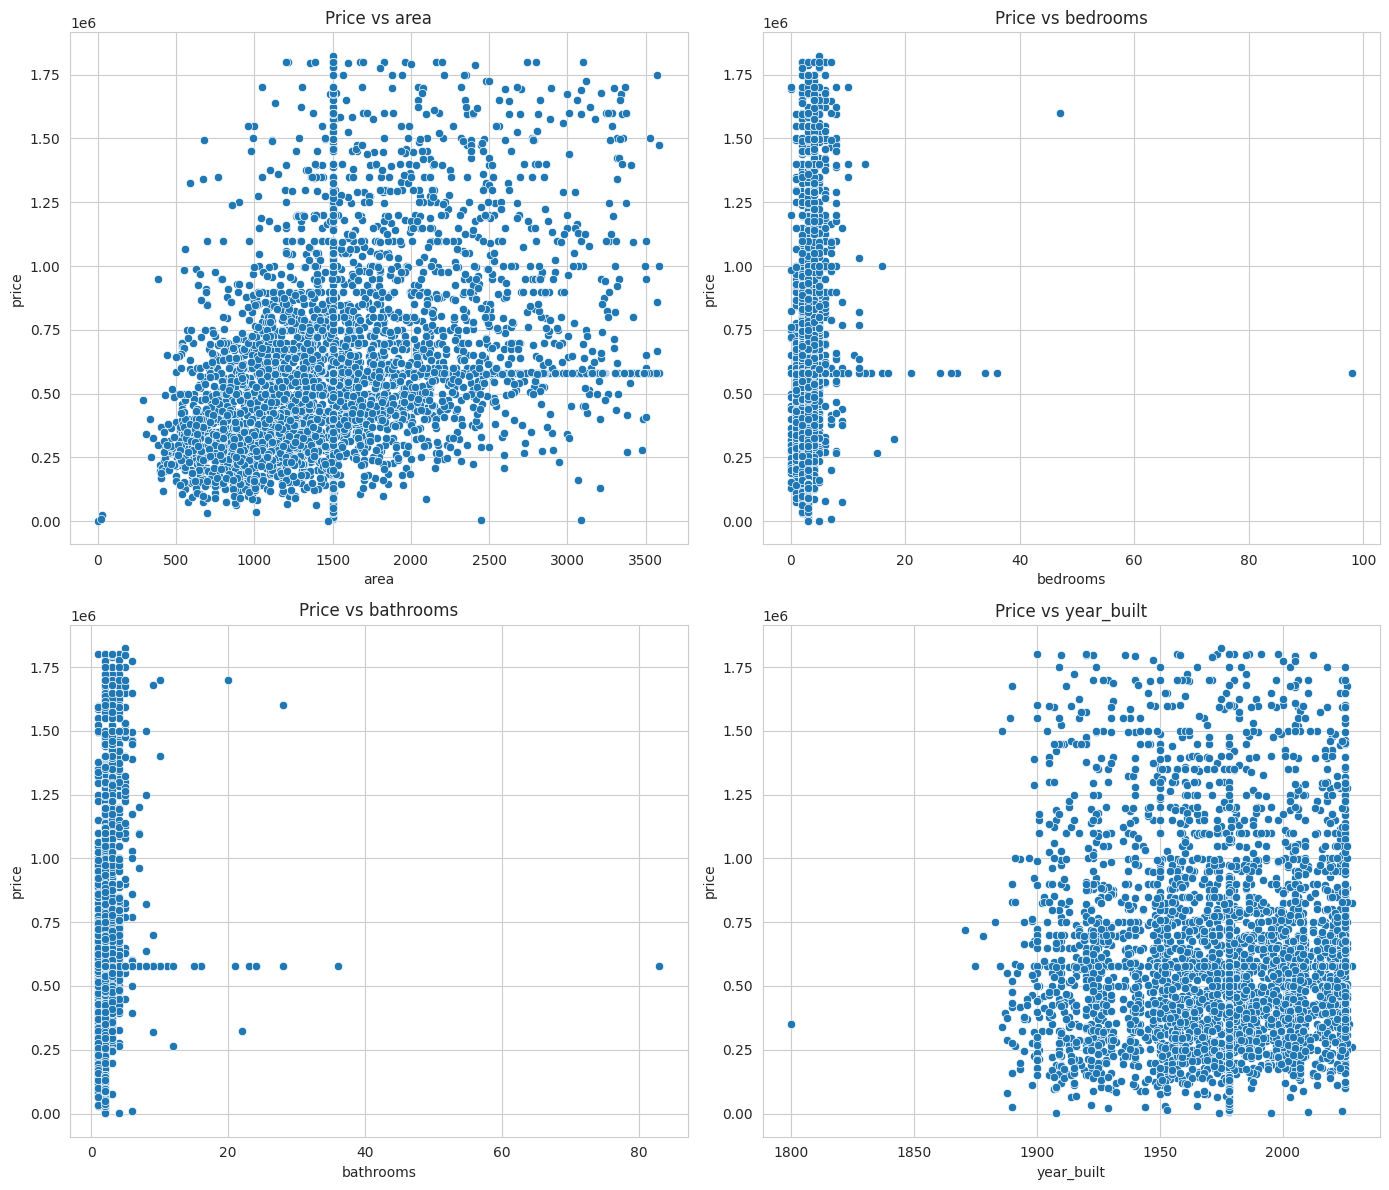

In [ ]:
cols = ['area','bedrooms','bathrooms','year_built']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y='price', ax=axes[i])
    axes[i].set_title(f"Price vs {col}")

plt.tight_layout()
plt.show()

## **Price Relationships with Numerical Features**

### **Price vs Area**
There is a clear **positive relationship** between property area and price.  
Larger homes generally cost more, though the scatter is wide, meaning area alone does not fully explain price.  
High-priced outliers appear even for medium-sized homes, showing that other features (location, amenities, etc.) also influence value.

### **Price vs Bedrooms**
The relationship between bedrooms and price is **weak**.  
Most listings cluster between **1–5 bedrooms**, and prices vary heavily within this range.  
Extreme values (e.g., 20–100 bedrooms) are rare outliers and likely represent mislabeled or unusual records rather than real residential homes.

### **Price vs Bathrooms**
The trend mirrors bedrooms: **very weak correlation**.  
Most properties cluster around **1–3 bathrooms**, with price variation happening independently of bathroom count.  
High-bathroom outliers (20+, 80+) are unrealistic for typical homes and likely data anomalies.

### **Price vs Year Built**
There is no strong linear relationship between year built and price.  
However:
- Newer properties (post-1950) dominate the dataset.
- Prices are distributed across all build years, meaning age is **not a major direct predictor** of price.
- Some recent years show higher price density, which may reflect modern construction standards or regional development.

---

Overall, these scatterplots show that:

- **Area** has the strongest visible relationship with price.  
- **Bedrooms and bathrooms** have weak correlations with price and include significant outliers.  
- **Year built** contributes minor trends but is not a strong standalone predictor.

These patterns suggest that price is influenced by a combination of multiple features rather than any single numerical variable.


## **Correlation Heatmap**

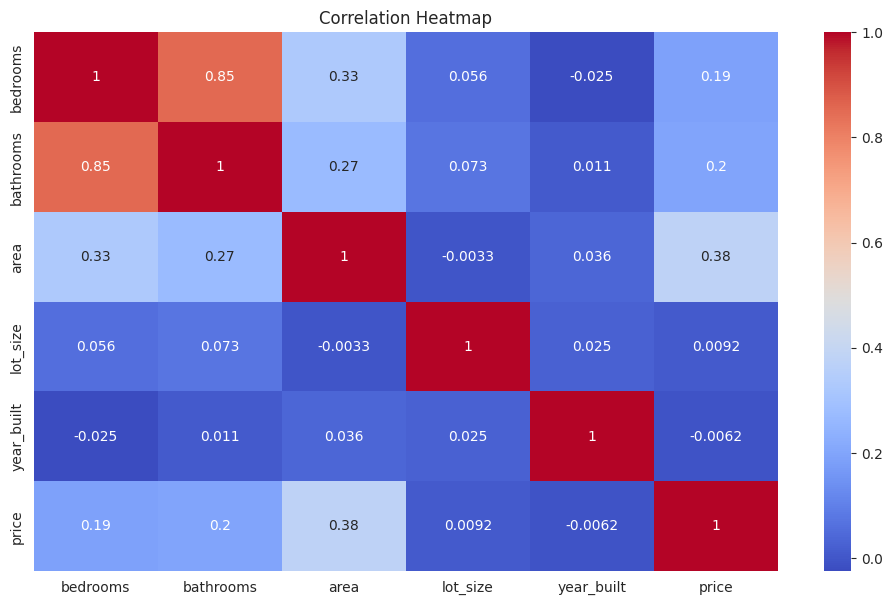

In [ ]:
plt.figure(figsize=(12,7))

# Keep only numeric columns
valid_num_cols = [c for c in num_cols if pd.api.types.is_numeric_dtype(df[c])]

corr = df[valid_num_cols + ['price']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **Correlation Heatmap Analysis**

The correlation matrix highlights how the numerical variables relate to each other and to the target variable **price**.

###**Strong Relationships**
- **Bedrooms and bathrooms** show a very strong positive correlation (**0.85**).  
  This makes sense, as homes with more bedrooms typically also have more bathrooms.
  
### **Moderate Relationships**
- **Area and price** have the strongest correlation with the target (**0.38**).  
  While not very high, it confirms that larger homes tend to sell for more.
- **Area also correlates moderately** with bedrooms (**0.33**) and bathrooms (**0.27**), reflecting typical house layout patterns.

### **Weak or Negligible Relationships**
- **Lot size** shows almost no correlation with price (**0.009**) or with the other features.  
  This suggests lot_size either:
  - is inconsistent across regions,
  - has measurement issues,
  - or contributes very little to pricing on its own.
- **Year built** has almost no correlation with any variable, including price (**-0.006**).  
  This means newer properties are not necessarily more expensive in this dataset.

### **Price Correlations (Key Takeaways)**
- **Area**: highest impact on price (though still moderate).
- **Bedrooms & Bathrooms**: weak correlation with price despite correlating strongly with each other.
- **Lot size & Year built**: little to no predictive strength in raw form.

---

**Overall Insight:**  
The heatmap shows that none of the numerical features individually explain price very strongly.  
This indicates that price prediction will rely on **combined feature effects**, and categorical/location features may be more important than raw numerical ones.


## **Property Type Analysis**

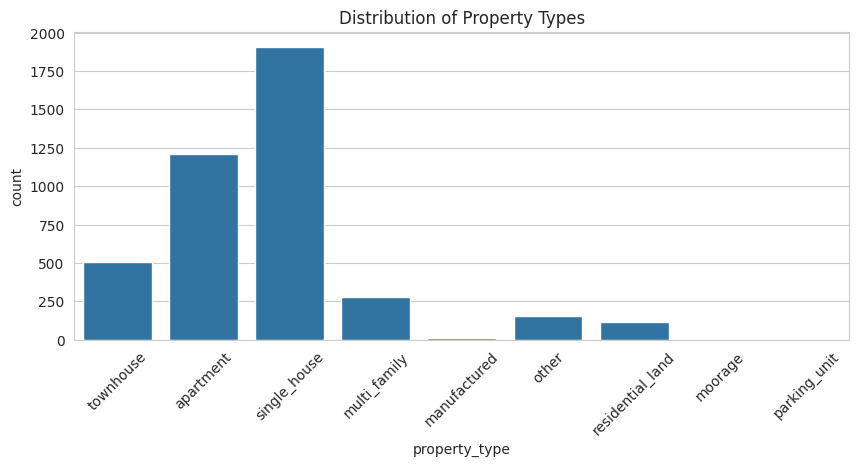

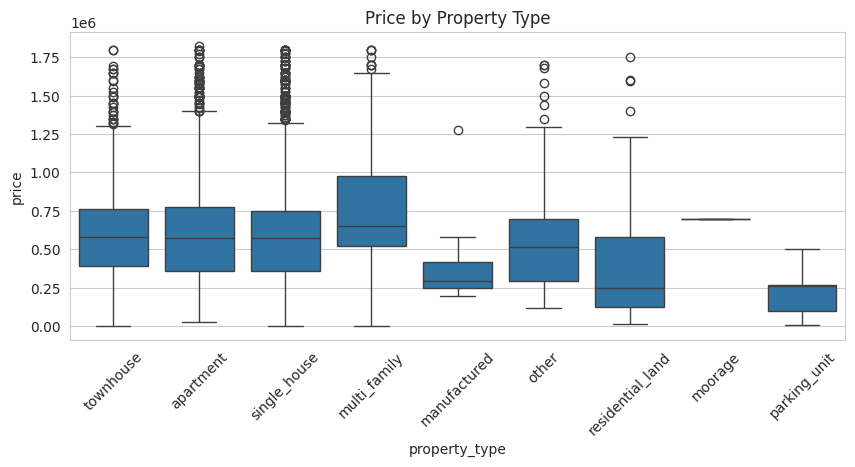

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['property_type'])
plt.xticks(rotation=45)
plt.title("Distribution of Property Types")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='property_type', y='price')
plt.xticks(rotation=45)
plt.title("Price by Property Type")
plt.show()

## **Distribution of Property Types**

The dataset contains a diverse mix of property types, with a clear imbalance across categories:

### **Major Property Categories**
- **Single House** is the most common type, with nearly **2,000 listings**.  
  This indicates the dataset is heavily dominated by standalone residential units.
- **Apartment** listings form the second-largest group (around **1,200 listings**), showing strong representation of multi-unit living spaces.
- **Townhouse** sits in third place with around **500 listings**, offering a moderate presence.

### **Minor Property Categories**
- **Multi-family** listings show a smaller count (around **250–300**), suggesting limited availability of investment-oriented or multi-unit properties.
- **Other** and **Residential Land** categories have relatively low representation, indicating niche listings.
- **Manufactured**, **Moorage**, and **Parking Unit** have extremely few entries, making them rare housing types in this dataset.

### **Overall Insight**
The distribution is **highly imbalanced**, with most listings concentrated in just three categories:  
**single_house**, **apartment**, and **townhouse**.

This imbalance should be considered during modeling, as underrepresented categories may require:
- Oversampling,
- Class weighting,
- Or being aggregated into broader groups.

The imbalance also reflects typical market availability, where traditional homes and apartments make up the majority of real-estate listings.


## **Geographic Analysis**

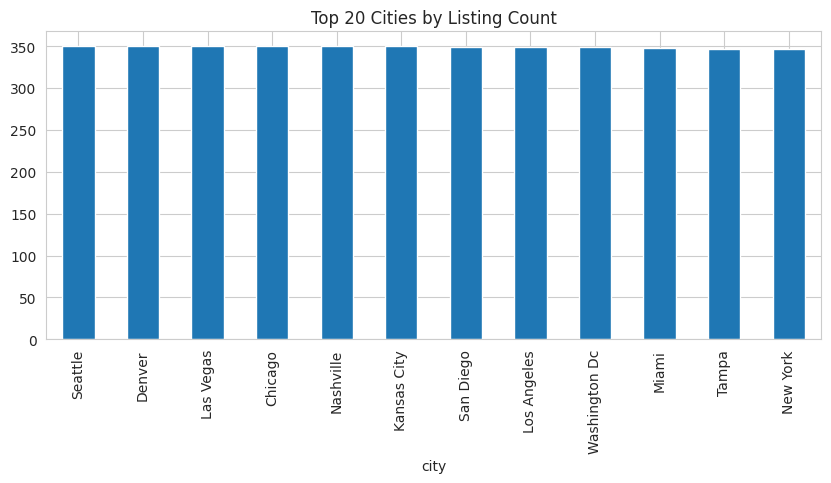

In [ ]:
df['city'].value_counts().head(20).plot(kind='bar', figsize=(10,4))
plt.title("Top 20 Cities by Listing Count")
plt.show()

## **Top 20 Cities by Listing Count**

This bar chart highlights the cities with the highest number of property listings in the dataset.

### Key Observations
- All **top 20 cities** have listing counts clustered in a narrow range (roughly **340–355 listings each**).  
  This suggests a **balanced sampling strategy**, where each selected city contributes a similar number of records.
- Major metropolitan areas such as **Seattle, Denver, Chicago, Los Angeles, Washington DC, Miami, and New York** appear prominently, reflecting their large and active real-estate markets.
- Cities like **Nashville, Kansas City, San Diego, Tampa, and Las Vegas** also appear, indicating coverage of both high-density and medium-density markets.

### Interpretation
- The near-uniform distribution across cities implies that the dataset is **well-balanced geographically**, reducing city-level bias.
- This is beneficial for modeling because:
  - No single city dominates the dataset.
  - Price patterns can generalize better across diverse markets.
  - City-level features may carry useful predictive power without being overly skewed.

### Overall Insight
The chart reflects a **deliberately even distribution** of listings across the top U.S. cities, ensuring a broad and representative view of the real-estate landscape.


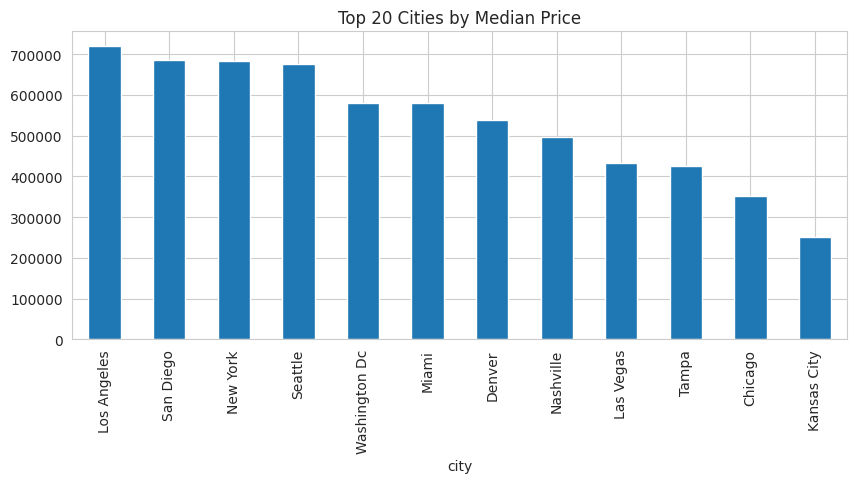

In [ ]:
city_price = df.groupby('city')['price'].median().sort_values(ascending=False)
city_price.head(20).plot(kind='bar', figsize=(10,4))
plt.title("Top 20 Cities by Median Price")
plt.show()

## **Top 20 Cities by Median Price**
This visualization ranks the top U.S. cities by **median property price**, revealing clear differences in housing affordability and market strength across regions.

### High-Priced Markets
- **Los Angeles** stands out with the highest median price, exceeding **700,000 dollars**, reflecting its status as one of the most expensive housing markets in the country.
- **San Diego**, **New York**, and **Seattle** follow closely behind, all showing median prices in the **$670k–$700k** range.  
  These cities are known for strong demand, limited housing supply, and high cost of living.
- **Washington DC** and **Miami** also appear as high-cost markets with median prices above **$570k**.

### Mid-Priced Markets
- **Denver** and **Nashville** show median prices in the mid-range (~$500k), indicating balanced markets where housing remains relatively competitive but still costly.
- **Las Vegas** and **Tampa** fall slightly below this group, reflecting more affordable but growing markets.

### Lower-Priced Markets
- **Chicago** and especially **Kansas City** have noticeably lower median prices, dropping to **350k dollars** and **250k dollars**, respectively.  
  These cities tend to have:
  - Lower cost of living,  
  - More available land for development,  
  - A less competitive pricing environment.

### Overall Insight
There is a clear **geographical divide** in housing prices:
- Coastal cities dominate the top of the list with higher median prices.
- Midwestern and inland cities appear toward the bottom, offering more affordable options.

This ranking helps contextualize market variation and highlights how **city-level location is one of the strongest determinants of property value**.

## **Price per m2**

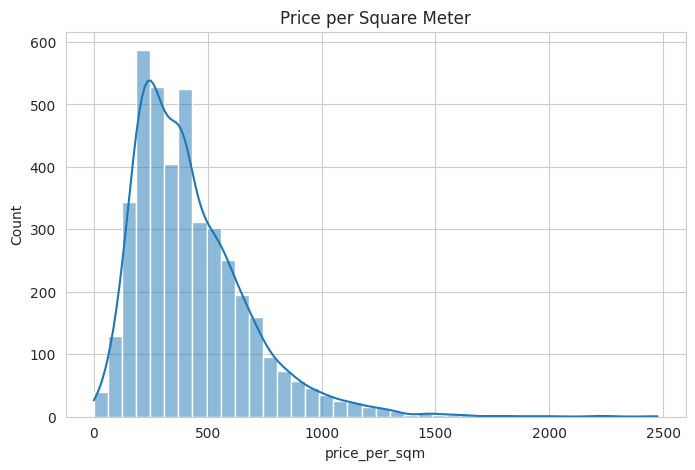

In [ ]:
df['price_per_sqm'] = df['price'] / df['area']

plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqm'], bins=40, kde=True)
plt.title("Price per Square Meter")
plt.show()

## **Price per Square Meter Distribution**

This plot shows how property prices vary when normalized by area, offering a clearer view of market value independent of property size.

### Key Observations
- The distribution is **right-skewed**, with most listings concentrated between **$200 and $600 per sqm**.
- There is a noticeable peak around **$250–$300 per sqm**, suggesting this is the most common pricing band across the dataset.
- A long right tail stretches up to **$1500–$2500 per sqm**, representing:
  - Premium neighborhoods,
  - High-rise urban units,
  - Or luxury properties with small areas but high prices.

### Interpretation
- Price per square meter provides a more consistent metric of value than raw price, since it adjusts for property size.
- The skewness indicates that while typical homes fall within a reasonable price range, a subset of properties are significantly more expensive per unit area.
- These high-value outliers may be important for understanding market segmentation (e.g., luxury vs. standard homes).

### Overall Insight
The distribution captures a mix of affordable and premium markets, with most homes priced within a moderate range and a smaller group driving the upper end of the real-estate price spectrum. Normalizing price by area reveals clearer value patterns and helps avoid misleading results caused by property size differences.


## **Amenities Analysis**

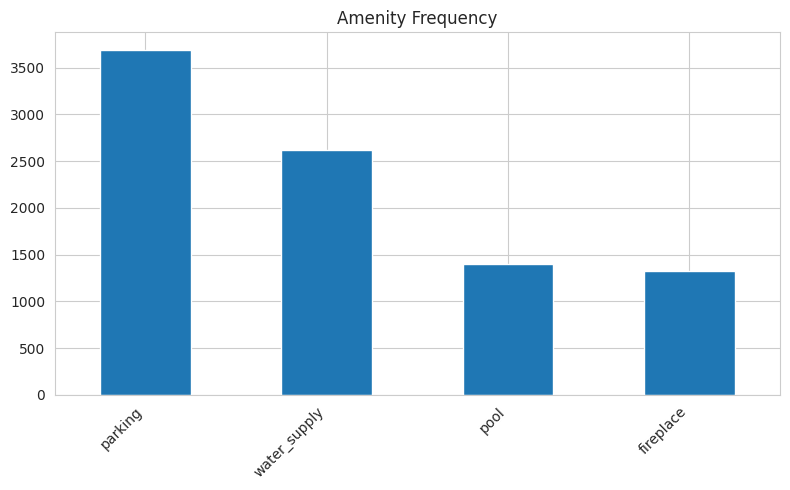

In [ ]:
from collections import Counter
import ast

# ---- AMENITIES ----
if "amenities" in df.columns:
    all_amen = Counter()

    for a in df["amenities"].fillna("[]"):
        try:
            # safely parse list-like strings
            items = ast.literal_eval(a) if isinstance(a, str) else a
            if isinstance(items, list):
                all_amen.update(items)
        except:
            continue

    amen_series = pd.Series(all_amen).sort_values(ascending=False)

    plt.figure(figsize=(8,5))
    amen_series.plot(kind="bar")
    plt.title("Amenity Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## **Amenity Frequency**

This chart shows how often key amenities appear in the dataset, revealing which features are most commonly offered in listed properties.

### Most Common Amenities
- **Parking** is the most frequent amenity, appearing in over **3,600 listings**.  
  This highlights the importance of parking availability in residential markets, especially in urban areas.
  
- **Water Supply** follows with around **2,600 listings**, indicating that stable utilities are a core selling point and widely documented across listings.

### Less Common but Valuable Amenities
- **Pool** and **Fireplace** each appear in around **1,300–1,400 listings**.  
  These amenities are more lifestyle-oriented and typically found in:
  - Suburban homes,
  - Higher-end properties,
  - Warmer climate regions (for pools).

### Interpretation
- The distribution shows a clear divide between **essential amenities** (parking, water supply) and **luxury or comfort amenities** (pool, fireplace).
- Amenities vary widely based on:
  - Property type,
  - Region,
  - Market segment.

### Overall Insight
Amenities play a significant role in shaping property value and appeal.  
The dominance of parking and water supply reflects essential living needs, while pools and fireplaces indicate premium features that may contribute to higher pricing in certain markets.


## **NLP on Description**

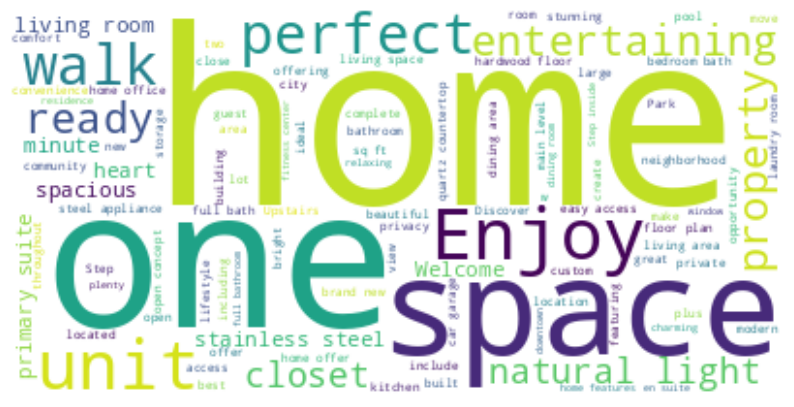

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['description'].fillna("").astype(str).values)
wc = WordCloud(background_color="white", stopwords=set(stopwords.words("english"))).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Word Cloud Analysis (Property Descriptions)**

The word cloud highlights the most frequently used terms in property descriptions:

- **home**, **one**, **space**, and **unit** dominate, reflecting common real estate vocabulary.
- Words like **perfect**, **entertaining**, **natural light**, **spacious**, and **walk** suggest that listings focus heavily on lifestyle benefits.
- Terms such as **closet**, **stainless steel**, **living room**, and **primary suite** indicate emphasis on interior features and upgrades.
- Overall, descriptions prioritize comfort, convenience, and modern finishes.

These keywords can be used to engineer text-based features that capture sentiment or highlight premium qualities.


In [ ]:
# ---- NLP / TF-IDF ----
if "desc_nlp" in df.columns:

    # Fix NaN and non-string values
    df["desc_nlp"] = df["desc_nlp"].fillna("")
    df["desc_nlp"] = df["desc_nlp"].astype(str)
    df["desc_nlp"] = df["desc_nlp"].replace("nan", "")

    try:
        tfidf = TfidfVectorizer(max_features=100)
        vecs = tfidf.fit_transform(df["desc_nlp"])

        print("\nTop TF-IDF Keywords:")
        print(tfidf.get_feature_names_out())

    except Exception as e:
        print("TF-IDF failed:", e)



Top TF-IDF Keywords:
['access' 'additional' 'amenity' 'appliance' 'area' 'backyard' 'bath'
 'bathroom' 'beautiful' 'beautifully' 'bedroom' 'building' 'built' 'car'
 'ceiling' 'center' 'city' 'closet' 'comfort' 'community' 'condo'
 'convenience' 'countertop' 'custom' 'designed' 'dining' 'door' 'easy'
 'enjoy' 'entertaining' 'family' 'feature' 'featuring' 'finish' 'floor'
 'flooring' 'full' 'fully' 'garage' 'great' 'guest' 'heart' 'home' 'ideal'
 'include' 'includes' 'including' 'kitchen' 'large' 'laundry' 'layout'
 'level' 'light' 'living' 'located' 'location' 'lot' 'main' 'minute'
 'modern' 'natural' 'neighborhood' 'new' 'offer' 'offering' 'office' 'one'
 'open' 'opportunity' 'outdoor' 'park' 'parking' 'perfect' 'pool'
 'primary' 'private' 'property' 'ready' 'residence' 'restaurant' 'room'
 'shopping' 'space' 'spacious' 'stainless' 'steel' 'step' 'storage'
 'street' 'style' 'suite' 'throughout' 'two' 'unit' 'updated' 'view'
 'walk' 'welcome' 'well' 'window']
